In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from collections import Counter

#import Data 
safe_water_df = pd.read_csv("water_potability.csv")
safe_water_df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.80216,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.57822,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.86938,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [2]:
#Column Dtypes
safe_water_df.dtypes


ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [3]:
#Fill NAn with Mean
column_headers = safe_water_df.columns
column_headers

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [4]:
for columns in column_headers:
    safe_water_df.fillna(safe_water_df[columns].mean(),inplace=True)

In [5]:
#export clean data
safe_water_df.to_csv('cleaned_data/completed_safe_water_df.csv')
safe_water_df = safe_water_df.round()

In [6]:
# target
X = safe_water_df.drop(['Potability'],axis=1)
X

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.0,205.0,20791.0,7.0,369.0,564.0,10.0,87.0,3.0
1,4.0,129.0,18630.0,7.0,7.0,593.0,15.0,56.0,5.0
2,8.0,224.0,19910.0,9.0,7.0,419.0,17.0,66.0,3.0
3,8.0,214.0,22018.0,8.0,357.0,363.0,18.0,100.0,5.0
4,9.0,181.0,17979.0,7.0,310.0,398.0,12.0,32.0,4.0
...,...,...,...,...,...,...,...,...,...
3271,5.0,194.0,47581.0,7.0,360.0,526.0,14.0,67.0,4.0
3272,8.0,194.0,17330.0,8.0,7.0,392.0,20.0,7.0,3.0
3273,9.0,176.0,33156.0,7.0,7.0,432.0,11.0,70.0,3.0
3274,5.0,231.0,11984.0,6.0,7.0,403.0,11.0,77.0,5.0


In [7]:
# features
y = safe_water_df.drop(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'],axis=1)
y

,Potability
0,0
1,0
2,0
3,0
4,0
...,...
3271,1
3272,1
3273,1
3274,1


In [8]:
# Check the balance of our target values
y.value_counts()

Potability
0             1998
1             1278
dtype: int64

In [9]:
# split training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)


X_train.shape

(2457, 9)

Ensemble Learners

#In this section, you will compare two ensemble algorithms to determine which algorithm results in the best performance. You will train a Balanced Random Forest Classifier and an Easy Ensemble AdaBoost classifier . For each algorithm, be sure to complete the folliowing steps:

1. Train the model using the training data. 
2. Calculate the balanced accuracy score from sklearn.metrics.
3. Print the confusion matrix from sklearn.metrics.
4. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.
5. For the Balanced Random Forest Classifier onely, print the feature importance sorted in descending order (most important feature to least important) along with the feature score

#Note: Use a random state of 1 for each algorithm to ensure consistency between tests

In [10]:
### Balanced Random Forest Classifier

In [11]:
# Resample the training data with the BalancedRandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.ensemble import BalancedRandomForestClassifier
BalancedRandomForestClassifier = BalancedRandomForestClassifier(n_estimators=100, random_state=1)
BalancedRandomForestClassifier.fit(X_train, y_train)

# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

X_train_scaled.shape 

# Create a random forest classifier
brf_model = BalancedRandomForestClassifier

# Fitting the model
brf_model = brf_model.fit(X_train_scaled, y_train)

# Making predictions using the testing data.
predictions = brf_model.predict(X_test_scaled)
predictions

C:\Users\Nice\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
C:\Users\Nice\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,

In [12]:
# Calculated the balanced accuracy score
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, predictions)
print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.6190476190476191


In [13]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actually Potable", "Actually Not Potable"], columns=["Predicted Potable", "Predicted Not Potable"]
)

print("Confusion Matrix")
display(cm_df)

Confusion Matrix


,Predicted Potable,Predicted Not Potable
Actually Potable,320,179
Actually Not Potable,133,187


In [14]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print("Classification Report")
print(classification_report_imbalanced(y_test, predictions))

Classification Report
                   pre       rec       spe        f1       geo       iba       sup

          0       0.71      0.64      0.58      0.67      0.61      0.38       499
          1       0.51      0.58      0.64      0.55      0.61      0.37       320

avg / total       0.63      0.62      0.61      0.62      0.61      0.38       819



In [15]:
# List the features sorted in descending order by feature importance
importances = brf_model.feature_importances_
importances

sorted(zip(brf_model.feature_importances_, X.columns), reverse=True)



[(0.158655374737815, 'Solids'),
 (0.1446537015156388, 'Hardness'),
 (0.14205968117130838, 'Conductivity'),
 (0.1368398605543314, 'Sulfate'),
 (0.12453783421230614, 'Trihalomethanes'),
 (0.09165858923547673, 'Organic_carbon'),
 (0.08453321957157782, 'ph'),
 (0.07123636276699954, 'Chloramines'),
 (0.04582537623454629, 'Turbidity')]

Text(0, 0.5, 'Count')

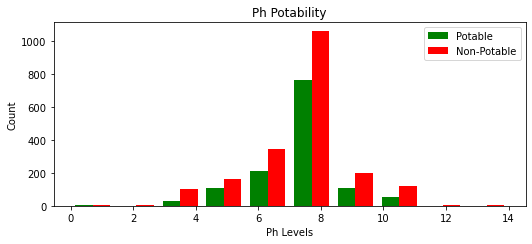

In [20]:
ph_info_potable = safe_water_df.loc[safe_water_df['Potability']==1].ph.round(0)
ph_info_nonpotable =safe_water_df.loc[safe_water_df['Potability']==0].ph.round(0)

fig, ((ax0)) = plt.subplots(nrows=1, ncols=1)


colors = ['green','red']
ax0.hist([ph_info_potable,ph_info_nonpotable], histtype='bar', color=colors, label=['Potable','Non-Potable'])
ax0.legend(prop={'size': 10})
ax0.set_title('Ph Potability')
ax0.set_xlabel('Ph Levels')
ax0.set_ylabel('Count')


In [30]:
safe_water_df.groupby(['Potability']).first()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
Potability,,,,,,,,,
0,7.0,205.0,20791.0,7.0,369.0,564.0,10.0,87.0,3.0
1,9.0,146.0,13169.0,9.0,311.0,593.0,9.0,78.0,4.0


In [23]:
print(ph_info_nonpotable.count(),ph_info_potable.count())



1998 1278


C:\Users\Nice\anaconda3\envs\PythonData\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


ValueError: setting an array element with a sequence.

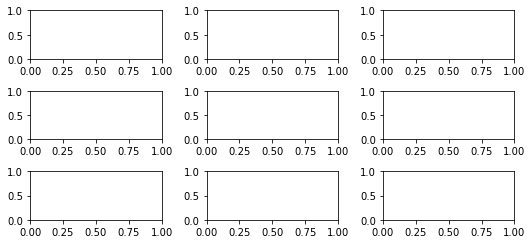

In [18]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True


fig, axes = plt.subplots(3, 3)

#""" Iterate column's axes"""
def iterate_columns(cols, x):
    for col in cols:
        col.plot(x, color=['green','red'])

#""" Iterate row's axes"""
for row in axes:
    for plots in range(2):
        safe_water_df_potable_info = safe_water_df.loc[safe_water_df['Potability']==1][column_headers[plots]]
        safe_water_df_nonpotable_info = safe_water_df.loc[safe_water_df['Potability']==0][column_headers[plots]]
        x = [safe_water_df_potable_info,safe_water_df_nonpotable_info]
        iterate_columns(row, x)

plt.show()

In [ ]:
safe_water_df_nonpotable_info